In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import model_selection
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive
import warnings
warnings.filterwarnings('ignore');

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#loading datasets
train=pd.read_csv('/content/sample_data/train_LZdllcl.csv')
test=pd.read_csv('/content/sample_data/test_2umaH9m.csv')

In [3]:
#adding test column in train data
train['test']=0
#adding test column in test data
test['test']=1

In [4]:
#adding is_promoted column in test data
test['is_promoted']=np.nan

In [5]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted', 'test'],
      dtype='object')

In [6]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'test', 'is_promoted'],
      dtype='object')

In [7]:
# arrange columns in train & test datas to match each other
train = train[['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'test', 'is_promoted']]

In [8]:
train.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,test,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0,0


In [9]:
test.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'test', 'is_promoted'],
      dtype='object')

In [10]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'test', 'is_promoted'],
      dtype='object')

In [11]:
# Combining train and test data using pandas
data =train.append(test)

In [12]:
train.shape

(54808, 15)

In [13]:
test.shape

(23490, 15)

In [14]:
data.shape

(78298, 15)

In [15]:
data.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'test', 'is_promoted'],
      dtype='object')

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           78298 non-null  int64  
 1   department            78298 non-null  object 
 2   region                78298 non-null  object 
 3   education             74855 non-null  object 
 4   gender                78298 non-null  object 
 5   recruitment_channel   78298 non-null  object 
 6   no_of_trainings       78298 non-null  int64  
 7   age                   78298 non-null  int64  
 8   previous_year_rating  72362 non-null  float64
 9   length_of_service     78298 non-null  int64  
 10  KPIs_met >80%         78298 non-null  int64  
 11  awards_won?           78298 non-null  int64  
 12  avg_training_score    78298 non-null  int64  
 13  test                  78298 non-null  int64  
 14  is_promoted           54808 non-null  float64
dtypes: float64(2), int6

In [17]:
data.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,test,is_promoted
count,78298.000000,78298.000000,78298.000000,72362.000000,78298.000000,78298.000000,78298.000000,78298.000000,78298.000000,54808.000000
mean,39149.500000,1.253378,34.797619,3.332219,5.848974,0.354032,0.023053,63.349664,0.300008,0.085170
std,22602.830026,0.606766,7.665928,1.260982,4.248070,0.478222,0.150073,13.383664,0.458264,0.279137
min,1.000000,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000,0.000000
25%,19575.250000,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000,0.000000
50%,39149.500000,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000,0.000000
75%,58723.750000,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,1.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.000000,1.000000,1.000000,99.000000,1.000000,1.000000


*   no_of trainings ranges from 1 to 10
*   age ranges from 20 to 60
*   previous_year_rating mean is 3
*  maximum length_of_service of an employee is 37
*   avg_training_score ranges between 39 & 99




In [18]:
#checking whether there is any duplicate employee_id
data[data.duplicated(['employee_id'])]

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,test,is_promoted


No duplicate in employee id

In [19]:
#checking missing values
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                3443
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     5936
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
test                        0
is_promoted             23490
dtype: int64

There are missing values in the education & previous _year_rating columns.

In [20]:
data['education'].value_counts()

Bachelor's          52247
Master's & above    21429
Below Secondary      1179
Name: education, dtype: int64

In [21]:
#filling missing values in  education
data['education']=data['education'].fillna("Bachelor's")

In [22]:
#filling missing values in previous_year_rating  with mean
data['previous_year_rating']=data['previous_year_rating'].fillna(data['previous_year_rating'].mean())

In [23]:
data.isna().sum()

employee_id                 0
department                  0
region                      0
education                   0
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating        0
length_of_service           0
KPIs_met >80%               0
awards_won?                 0
avg_training_score          0
test                        0
is_promoted             23490
dtype: int64

In [24]:
data["is_promoted"].value_counts()

0.0    50140
1.0     4668
Name: is_promoted, dtype: int64

4668 employees are eligible for promotion in training set

In [25]:
#removing region values prefix
data['region'] = data['region'].str.replace('region_','')

In [26]:
# Creating dummy variables for categorical datatypes
data = pd.get_dummies(data, columns=['department','region','education','recruitment_channel'])
data.head()

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,test,...,region_6,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,f,1,35,5.0,8,1,0,49,0,...,0,1,0,0,0,0,1,0,0,1
1,65141,m,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,m,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,m,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,m,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0


In [27]:
#Replacing female as 0 and male as 1 in gender column
data=data.replace({'gender':{'f':0,'m':1}})

In [28]:
data.head(5)

,employee_id,gender,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,test,...,region_6,region_7,region_8,region_9,education_Bachelor's,education_Below Secondary,education_Master's & above,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing
0,65438,0,1,35,5.0,8,1,0,49,0,...,0,1,0,0,0,0,1,0,0,1
1,65141,1,1,30,5.0,4,0,0,60,0,...,0,0,0,0,1,0,0,1,0,0
2,7513,1,1,34,3.0,7,0,0,50,0,...,0,0,0,0,1,0,0,0,0,1
3,2542,1,2,39,1.0,10,0,0,50,0,...,0,0,0,0,1,0,0,1,0,0
4,48945,1,1,45,3.0,2,0,0,73,0,...,0,0,0,0,1,0,0,1,0,0


In [29]:
data.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'test', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33', 'region_34',
       'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above

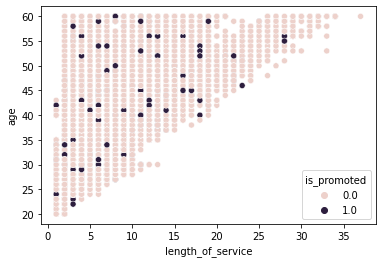

In [30]:
sns.scatterplot(y='age', x='length_of_service', hue='is_promoted', data=data)

Employee with age between 23 to 60 yrs and lenght of service between 2 to 20 yrs have more chance of promotion

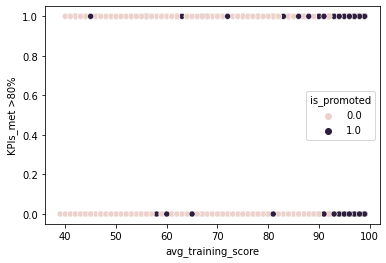

In [31]:
sns.scatterplot(y='KPIs_met >80%', x='avg_training_score', hue='is_promoted', data=data)

Employees with KPIs_met >80% & avg_training_score between 80 to 100 have more chance of promotion.Also employees with KPIs_met < 80% & avg_training_score between 90 & 100 have chance for promotion.

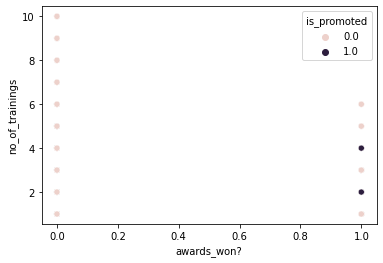

In [32]:
sns.scatterplot(y='no_of_trainings', x='awards_won?', hue='is_promoted', data=data)

In [33]:
data.dtypes

employee_id                       int64
gender                            int64
no_of_trainings                   int64
age                               int64
previous_year_rating            float64
length_of_service                 int64
KPIs_met >80%                     int64
awards_won?                       int64
avg_training_score                int64
test                              int64
is_promoted                     float64
department_Analytics              uint8
department_Finance                uint8
department_HR                     uint8
department_Legal                  uint8
department_Operations             uint8
department_Procurement            uint8
department_R&D                    uint8
department_Sales & Marketing      uint8
department_Technology             uint8
region_1                          uint8
region_10                         uint8
region_11                         uint8
region_12                         uint8
region_13                         uint8


In [34]:
#conerting data type of previous_year_rating to int
data[['previous_year_rating']] = data[['previous_year_rating']].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78298 entries, 0 to 23489
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   78298 non-null  int64  
 1   gender                        78298 non-null  int64  
 2   no_of_trainings               78298 non-null  int64  
 3   age                           78298 non-null  int64  
 4   previous_year_rating          78298 non-null  int64  
 5   length_of_service             78298 non-null  int64  
 6   KPIs_met >80%                 78298 non-null  int64  
 7   awards_won?                   78298 non-null  int64  
 8   avg_training_score            78298 non-null  int64  
 9   test                          78298 non-null  int64  
 10  is_promoted                   54808 non-null  float64
 11  department_Analytics          78298 non-null  uint8  
 12  department_Finance            78298 non-null  uint8  
 13  d

In [36]:
data.columns

Index(['employee_id', 'gender', 'no_of_trainings', 'age',
       'previous_year_rating', 'length_of_service', 'KPIs_met >80%',
       'awards_won?', 'avg_training_score', 'test', 'is_promoted',
       'department_Analytics', 'department_Finance', 'department_HR',
       'department_Legal', 'department_Operations', 'department_Procurement',
       'department_R&D', 'department_Sales & Marketing',
       'department_Technology', 'region_1', 'region_10', 'region_11',
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16',
       'region_17', 'region_18', 'region_19', 'region_2', 'region_20',
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25',
       'region_26', 'region_27', 'region_28', 'region_29', 'region_3',
       'region_30', 'region_31', 'region_32', 'region_33', 'region_34',
       'region_4', 'region_5', 'region_6', 'region_7', 'region_8', 'region_9',
       'education_Bachelor's', 'education_Below Secondary',
       'education_Master's & above

In [37]:
#arranging the columns
data_df = data[['gender', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', \
       'awards_won?', 'avg_training_score', \
       'department_Analytics', 'department_Finance', 'department_HR', \
       'department_Legal', 'department_Operations', 'department_Procurement', \
       'department_R&D', 'department_Sales & Marketing', 'department_Technology', \
       'region_1', 'region_2', 'region_3', 'region_4', 'region_5', \
       'region_6', 'region_7', 'region_8', 'region_9', 'region_10', 'region_11', \
       'region_12', 'region_13', 'region_14', 'region_15', 'region_16', \
       'region_17', 'region_18', 'region_19', 'region_20', \
       'region_21', 'region_22', 'region_23', 'region_24', 'region_25', \
       'region_26', 'region_27', 'region_28', 'region_29', 'region_30', \
       'region_31', 'region_32', 'region_33', 'region_34', \
       'education_Below Secondary', 'education_Bachelor\'s', \
       'education_Master\'s & above', \
       'recruitment_channel_referred', 'recruitment_channel_sourcing', \
       'recruitment_channel_other', 'test', 'is_promoted']];

In [38]:
data_df.columns

Index(['gender', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'department_Analytics', 'department_Finance',
       'department_HR', 'department_Legal', 'department_Operations',
       'department_Procurement', 'department_R&D',
       'department_Sales & Marketing', 'department_Technology', 'region_1',
       'region_2', 'region_3', 'region_4', 'region_5', 'region_6', 'region_7',
       'region_8', 'region_9', 'region_10', 'region_11', 'region_12',
       'region_13', 'region_14', 'region_15', 'region_16', 'region_17',
       'region_18', 'region_19', 'region_20', 'region_21', 'region_22',
       'region_23', 'region_24', 'region_25', 'region_26', 'region_27',
       'region_28', 'region_29', 'region_30', 'region_31', 'region_32',
       'region_33', 'region_34', 'education_Below Secondary',
       'education_Bachelor's', 'education_Master's & above',
       'recruitment_channel_referred', 're

In [39]:
#splitting into train and test dataset
train = data_df[data_df['test'] == 0]
test = data_df[data_df['test'] == 1]

In [40]:
# Remove test column from train and test
del train['test']
del test['test']

In [41]:
train.columns.get_loc("is_promoted") #location of target column

57

In [42]:
# Assigning default value as Zero for is_promoted column in test dataset
test['is_promoted'] = 0.0

In [43]:
train_array = train.values
x_train = train_array[:,0:57] 
y_train = train_array[:,57]

test_array = test.values
x_test = test_array[:,0:57] 
y_test = test_array[:,57]

In [44]:
#Logistic Regression model
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)
print('Accuracy of LR model is',accuracy_score(y_test,y_pred))

Accuracy of LR model is 0.9807577692635164


In [45]:
#Decision tree classifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Accuracy on decision tree model is:',accuracy_score(y_test,y_pred))

Accuracy on decision tree model is: 0.909323116219668


In [46]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9712643678160919

In [47]:
#Fitting gaussian Naive Bayes 
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
y_pred=nb.predict(x_test)
accuracy_score(y_test,y_pred)

0.5191570881226054

Logistic regression model is having high accuracy compared to other models.

In [48]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(x_train, y_train)
predictions = lda.predict(x_test)
print(accuracy_score(y_test, predictions))

0.969220945083014


In [49]:
#storing the final predicted result for test dataset into sample_submission.csv

sample_submission = data.loc[(data.test == 1), ['employee_id']]
sample_submission['is_promoted'] = list(predictions)
sample_submission['is_promoted']=sample_submission['is_promoted'].astype(int)
sample_submission.to_csv('sample.csv',index=False)

In [50]:
sample_submission[sample_submission['is_promoted']==1].count()

employee_id    723
is_promoted    723
dtype: int64

723 employee promoted from the test dataset as per final prediction